# Genoma Class


In [8]:
from multiprocessing.sharedctypes import copy
from quopri import decodestring
from random import *
import random
class Genoma:
    def __init__(self, numberOfGenes = 60, nInputs = 4,nOutputs = 1, rateMutation = 0.10):
        self.genotipo = []
        self.copyGenotipo = []
        self.numberOfGenes = numberOfGenes
        self.faultChance = 0
        self.nInputs = nInputs
        self.nOutputs = nOutputs
        self.possiblesOutputs = 2**nInputs
        self.fitness = 0.0
        self.noiseFitness = 0.0
        self.rateMutation = rateMutation
        self.deadGenesRate = 0.6
        self.activeGenesRate = 0.4
        self.flagDeadActive = 0
        self.indexDeadGenes = []
        self.indexActiveGenes = []
        self.Stochasticity = 0.003
        self.ToEvaluate = []

    def setFitness(self, fitness):
      self.fitness = fitness

    def setGenotipo(self, a):
      self.genotipo = a.copy()

    def setFaultChance(self,newFaultChance=0):
      self.faultChance = newFaultChance

    def getGenotypeActiveZone(self):
      # Return the numberid and the gene that is in active zone.
      # Return (numberId,Gene)
      # Return (int,str)
      if self.genotipo:
        self.identify_deadGenes()
        return [(i+self.nInputs,gene) for i,gene in enumerate(self.genotipo) if self.ToEvaluate[i]]
      else:
        return []
      
    def getGenotypeDeadZone(self):
      # Return the numberid and the gene that is in dead zone.
      # Return (numberId,Gene)
      # Return (int,str)
      if self.genotipo:
        self.identify_deadGenes()
        return [(i+self.nInputs,gene) for i,gene in enumerate(self.genotipo) if not self.ToEvaluate[i]]
      else:
        return []
    
    def fill_Initial_Genome(self):
        for i in range (0,self.numberOfGenes):
            self.genotipo.append("")

    def generate_parent(self):  

        self.fill_Initial_Genome()          # fill the genome with the rigth length
        
        for i in range(0,self.numberOfGenes):

            in1 = randint(0,i+self.nInputs-1)    # returns a number between 0 and n (PS: in randint() both inputs are included)
            in2 = randint(0,i+self.nInputs-1)    # returns a number between 0 and n (PS: in randint() both inputs are included)
        
            sin1 = str(in1)
            sin2 = str(in2)

            gene = sin1 +"-"+ sin2
            self.genotipo.pop(i)
            self.genotipo.insert(i, gene)

    def identify_deadGenes(self):
    
        for i in range (0,self.numberOfGenes-self.nOutputs):
          self.ToEvaluate.append(False)

        for i in range (0, self.nOutputs):
          self.ToEvaluate.append(True)

        p = self.numberOfGenes-1
        while p>=0:
          if self.ToEvaluate[p]:
            inputs = self.genotipo[p].split("-")
            #print(inputs)
            input1 = int(inputs[0])
            input2 = int(inputs[1])
            x = input1 - self.nInputs
            y = input2 - self.nInputs
            if(x >= 0):
              self.ToEvaluate[x] = True
            if(y >= 0):
              self.ToEvaluate[y] = True

          p-=1
      
    def nandExpression(self,a,b):
      return "not("+a+" and "+b+")"

    def getLogicExpression(self):
      self.identify_deadGenes()
      p = self.numberOfGenes-1
      while p>=0:
        if self.ToEvaluate[p]:
          break
      return self.getNandActives(self.genotipo[p])
          
    def getNandActives(self,inputsGene):

      inputs = inputsGene.split("-")
      input1 = inputs[0]
      input2 = inputs[1]
      if(int(input1) - 2 < 0):
        if(int(input2) -2 < 0):
          return self.nandExpression(input1,input2)
        else:
          return self.nandExpression(input1,self.getNandActives(self.genotipo[int(input2) - 2]))
      else:
        if(int(input2) -2 < 0):
          return self.nandExpression(self.getNandActives(self.genotipo[int(input1) - 2]),input2)
        else:
          return self.nandExpression(self.getNandActives(self.genotipo[int(input1) - 2]),self.getNandActives(self.genotipo[int(input2) - 2]))

    def xor(self, l):
        count = 0
        n = len(l)
        if(l[n] + l[n-1] == 1):
          return 1
        else :
          return 0

    def gpiNand(self, l, nOutputs=1):
        count = 0
        n = len(l)
        for i in range(0,n):
          if(l[i] == 1):
            count+=1

        if(count%2 == 0):
            return "0"
        else: 
            return "1"

    def fullAdderNand(self,l,nOutputs):
      # Preparing
      middle = int(len(l)/2) + 1
      input1 = [str(x) for x in l[1:middle]]
      input2 = [str(x) for x in l[middle:]]
      cIn = [str(l[0])]
      input1s = ''.join(input1) 
      input2s = ''.join(input2)
      cIns = ''.join(cIn)
      #print(input1s, input2s, cIns)
      # Logical Expressions
      sum = bin(int(input1s, 2) ^ int(input2s, 2) ^ int(cIns, 2))[2:]
      cOut = bin((int(input1s, 2) & int(input2s, 2)) | (int(input2s, 2) & int(cIns, 2)) | (int(input1s, 2) & int(cIns, 2)))[2:]
      sum_bits =str(sum) + str(cOut) 
      sum_bits_string = sum_bits.zfill(nOutputs)
      #print(sum_bits_string)
      # Returning
      return sum_bits_string

    def NAND(self,a,b):  ### NAND 1 1 1 0
        output = 1
        if a == 1 and b == 1:
            output = 0
        return output

    def NAND1(self, a, b): ### NAND1 1 1 1 1
      return 1

    def NAND2(self, a, b): ### NAND2 1 0 1 0
      return not(b)

    def NAND3(self, a, b): ### NAND3 1 1 0 0
      return not(a)

    def NAND4(self, a, b): ### NAND4 0 0 0 0
      return 0

    def NAND_defeitos (self, a, b):
      value = random.uniform(0,1)
      if value>(self.faultChance):
          output = 1
          if a == 1 and b == 1:
              output = 0
      else:
        ## Choose between the 4 types of error
        type_of_error = random.randint(0, 100)
        if type_of_error <= 44:
          output = self.NAND1(a, b) ## 44%
        elif type_of_error > 44 and type_of_error <= 66:
          output = self.NAND2(a, b) ## 22%
        elif type_of_error > 66 and type_of_error <= 88:
          output = self.NAND3(a, b) ## 22%
        else:
          output = self.NAND4(a, b) ## 12%
      return output

    def getCartesianProduct(self,l):
        CartesianProduct = [[]]
        for iterable in l:
          CartesianProduct = [a+[b] for a in CartesianProduct for b in iterable]
        return CartesianProduct

    def redundantCalcFitness(self,trys,GPINAND_ID):

        listGenome = []
        x = "2-3 2-0 0-0 2-5 5-1 8-6 1-3 9-1 4-2 11-10 4-11 5-0 4-14 10-8 3-9 15-7 14-14 13-17 8-3 11-3 11-0 21-13 3-1 26-25 5-5 25-8 6-13 0-4 8-10 32-16 23-16 15-17 23-26 34-26 19-26 7-37 30-24 23-5 16-12 22-37 31-15 29-27 27-34 26-43 43-9 23-34 3-16 47-0 27-3 5-52 44-45 19-47 16-32 41-14 9-54 39-38 31-44 23-10 50-42 59-55"
        lx = x.split(" ")
        listGenome.append(lx)

        x = "1-2 4-2 1-5 0-0 7-6 8-8 5-6 8-3 3-7 4-10 3-11 2-6 7-9 0-11 6-1 4-10 13-19 18-11 10-10 6-21 17-17 7-13 12-17 6-20 10-0 20-8 19-3 26-20 5-0 9-21 14-8 29-26 22-28 34-18 30-31 6-7 17-35 40-13 14-39 30-28 38-11 40-3 16-29 36-28 40-2 42-17 12-43 15-8 22-9 23-9 49-6 0-44 3-47 13-35 38-26 58-20 42-47 34-29 11-10 59-41"
        lx = x.split(" ")
        listGenome.append(lx)

        x = "2-0 2-3 3-5 5-6 1-0 2-5 6-9 2-10 0-8 8-9 1-8 14-12 5-10 5-6 2-12 17-9 13-16 6-15 17-7 22-7 16-20 11-18 22-7 11-12 13-3 18-13 24-15 5-28 21-16 7-8 6-14 10-5 0-18 21-32 11-11 3-28 8-2 2-11 11-5 16-5 29-39 13-6 29-22 4-37 29-11 4-48 24-44 10-2 51-35 32-30 8-46 22-0 53-23 42-35 31-1 4-32 42-39 5-11 48-38 53-26"
        lx = x.split(" ")
        listGenome.append(lx)

        x = "2-0 2-0 3-3 1-6 7-1 2-5 3-8 5-9 8-1 6-10 1-6 12-10 1-7 10-5 3-14 4-7 0-5 16-19 11-17 20-3 3-23 8-16 0-9 25-12 8-6 9-20 15-29 24-18 27-18 4-27 29-29 15-30 11-34 12-33 36-14 27-25 23-33 25-25 2-39 30-29 6-19 12-10 23-19 29-39 14-20 13-32 15-28 2-9 12-14 43-17 41-47 36-42 22-29 28-26 40-2 57-2 3-10 5-60 22-14 43-35"
        lx = x.split(" ")
        listGenome.append(lx)

        x = "1-3 3-1 1-5 3-3 1-2 2-6 2-4 2-2 6-8 1-10 11-5 5-3 0-11 15-15 7-6 1-6 8-1 2-15 18-5 1-3 6-15 13-7 15-22 11-21 24-27 25-21 2-15 0-22 26-0 25-4 22-31 4-29 24-30 34-32 23-2 0-3 23-10 28-8 41-28 39-5 17-29 4-11 28-37 32-7 13-20 44-43 39-46 50-32 42-41 44-13 3-5 7-11 10-20 56-51 19-0 39-53 2-37 1-28 11-46 60-62"
        lx = x.split(" ")
        listGenome.append(lx)

        x = "3-0 0-1 5-1 4-6 5-0 4-2 6-7 5-3 7-2 11-8 5-10 3-9 6-3 3-0 17-3 7-12 12-7 6-9 11-3 18-8 2-12 24-20 17-22 9-23 25-23 13-25 13-0 10-16 21-29 29-25 21-28 20-8 15-30 29-2 20-15 30-11 30-31 38-4 34-41 1-34 38-25 13-1 45-19 23-20 27-25 7-4 6-15 29-37 34-11 1-19 43-37 29-13 35-5 5-36 35-30 53-15 59-48 13-44 37-20 55-33"
        lx = x.split(" ")
        listGenome.append(lx)

        x = "2-0 4-4 0-3 6-0 6-3 8-7 2-9 10-9 1-1 12-10 4-5 6-12 3-8 2-10 14-15 8-14 11-17 12-12 1-4 15-20 23-4 2-16 7-17 23-21 16-23 6-28 9-26 3-10 27-25 32-32 22-31 34-18 33-5 1-10 27-26 12-20 2-8 2-29 10-40 39-0 17-4 23-19 14-19 0-24 11-4 6-48 43-4 12-47 47-7 17-9 27-39 30-5 10-39 47-33 9-11 52-2 53-3 5-21 48-30 39-27"
        lx = x.split(" ")
        listGenome.append(lx)

        x = "2-2 0-3 5-0 4-6 1-2 1-4 3-5 10-6 3-4 2-4 12-2 12-4 2-8 9-16 10-17 18-2 13-17 1-20 19-17 13-1 2-23 1-0 17-0 22-22 11-27 7-27 13-18 9-4 7-7 30-22 26-32 25-27 31-12 21-6 31-2 15-21 1-28 4-10 11-20 6-30 39-27 5-12 1-11 16-13 18-6 43-23 27-24 20-46 32-2 47-6 37-45 44-10 5-43 41-44 56-13 26-1 8-29 44-54 55-34 42-43"
        lx = x.split(" ")
        listGenome.append(lx)

        x = "0-1 1-4 3-1 6-3 0-0 4-0 1-1 9-5 4-8 3-11 10-6 7-5 8-9 2-5 1-4 13-3 13-12 18-1 11-13 0-10 22-19 15-16 3-23 2-24 22-14 22-21 14-29 29-6 27-2 8-16 33-6 28-6 23-3 5-21 7-37 30-30 39-5 9-39 30-10 27-2 15-32 44-11 22-41 33-31 6-31 24-29 14-25 29-6 35-10 23-41 9-36 12-29 27-24 47-16 8-42 47-24 16-16 2-41 29-58 56-32"
        lx = x.split(" ")
        listGenome.append(lx)
        
        listGenomeRedundant = []
        for i in range(0,9):
          listGenomeRedundant.append(listGenome[GPINAND_ID-1])
        
        print("GPINAND_ID:",GPINAND_ID,listGenomeRedundant[GPINAND_ID-1])
        
        listFitness = []
        for i in range(0,trys):
          matrixOuts = []
          l = []
          dic =  dict() 

          for i in range(0,self.nInputs):
              subL = [0,1]
              l.append(subL)

          TrueTable = self.getCartesianProduct(l)

          for i in range(0,self.possiblesOutputs):
              ithTrueTable = TrueTable[i]
              for input in range(0,self.nInputs):
                  sinput = str(input)
                  dic[sinput] = ithTrueTable[input]
              
              listOuts = []
              for genoma in listGenomeRedundant:
                indexOut = self.nInputs
                for element in genoma:
                    if(True):
                      elements = element.split("-")
                      in1 = elements[0]
                      in2 = elements[1]
                      out = self.NAND_defeitos(dic[in1], dic[in2])
                      sindexOut = str(indexOut)
                      dic[sindexOut] = out
                    indexOut+=1
                
                lGPINAND = []
                for m in range(0,self.nInputs):
                  sm = str(m)
                  value = dic[sm]
                  lGPINAND.append(value)
                listOuts.append(dic[sindexOut])

              matrixOuts.append(listOuts)
          
#          print(dic)

          outTrue = []                      #
          for i in TrueTable:               # Get the truTable inputs values
            outTrue.append(int(self.gpiNand(i))) #

#          for i in range(0,self.possiblesOutputs):
#            print("Para:", TrueTable[i], " as saidas foram:")
#            print(matrixOuts[i])
          

          result = []
          for outsList in matrixOuts:
            if(outsList.count(1) > outsList.count(0)):
              result.append(1)
            else:
              result.append(0)           
          
#          print("\n\nA lista dos outputs CORRETOS é:\n", outTrue)
#          print("\nA lista dos outputs dos mais votados é:\n",result,"\n")
          c = 0
          for i in range(0,self.possiblesOutputs):
            if(result[i] == outTrue[i]):
              c+=1
          fitness = c/self.possiblesOutputs
          listFitness.append(fitness)
        
        c = 0
        for fitness in listFitness:
          c += fitness
        print(listFitness)
        return c/trys

    def redundantDegenerationCalcFitness(self,trys):
        listGenome = []
        x = "2-3 2-0 0-0 2-5 5-1 8-6 1-3 9-1 4-2 11-10 4-11 5-0 4-14 10-8 3-9 15-7 14-14 13-17 8-3 11-3 11-0 21-13 3-1 26-25 5-5 25-8 6-13 0-4 8-10 32-16 23-16 15-17 23-26 34-26 19-26 7-37 30-24 23-5 16-12 22-37 31-15 29-27 27-34 26-43 43-9 23-34 3-16 47-0 27-3 5-52 44-45 19-47 16-32 41-14 9-54 39-38 31-44 23-10 50-42 59-55"
        lx = x.split(" ")
        listGenome.append(lx)

        x = "1-2 4-2 1-5 0-0 7-6 8-8 5-6 8-3 3-7 4-10 3-11 2-6 7-9 0-11 6-1 4-10 13-19 18-11 10-10 6-21 17-17 7-13 12-17 6-20 10-0 20-8 19-3 26-20 5-0 9-21 14-8 29-26 22-28 34-18 30-31 6-7 17-35 40-13 14-39 30-28 38-11 40-3 16-29 36-28 40-2 42-17 12-43 15-8 22-9 23-9 49-6 0-44 3-47 13-35 38-26 58-20 42-47 34-29 11-10 59-41"
        lx = x.split(" ")
        listGenome.append(lx)

        x = "2-0 2-3 3-5 5-6 1-0 2-5 6-9 2-10 0-8 8-9 1-8 14-12 5-10 5-6 2-12 17-9 13-16 6-15 17-7 22-7 16-20 11-18 22-7 11-12 13-3 18-13 24-15 5-28 21-16 7-8 6-14 10-5 0-18 21-32 11-11 3-28 8-2 2-11 11-5 16-5 29-39 13-6 29-22 4-37 29-11 4-48 24-44 10-2 51-35 32-30 8-46 22-0 53-23 42-35 31-1 4-32 42-39 5-11 48-38 53-26"
        lx = x.split(" ")
        listGenome.append(lx)

        x = "2-0 2-0 3-3 1-6 7-1 2-5 3-8 5-9 8-1 6-10 1-6 12-10 1-7 10-5 3-14 4-7 0-5 16-19 11-17 20-3 3-23 8-16 0-9 25-12 8-6 9-20 15-29 24-18 27-18 4-27 29-29 15-30 11-34 12-33 36-14 27-25 23-33 25-25 2-39 30-29 6-19 12-10 23-19 29-39 14-20 13-32 15-28 2-9 12-14 43-17 41-47 36-42 22-29 28-26 40-2 57-2 3-10 5-60 22-14 43-35"
        lx = x.split(" ")
        listGenome.append(lx)

        x = "1-3 3-1 1-5 3-3 1-2 2-6 2-4 2-2 6-8 1-10 11-5 5-3 0-11 15-15 7-6 1-6 8-1 2-15 18-5 1-3 6-15 13-7 15-22 11-21 24-27 25-21 2-15 0-22 26-0 25-4 22-31 4-29 24-30 34-32 23-2 0-3 23-10 28-8 41-28 39-5 17-29 4-11 28-37 32-7 13-20 44-43 39-46 50-32 42-41 44-13 3-5 7-11 10-20 56-51 19-0 39-53 2-37 1-28 11-46 60-62"
        lx = x.split(" ")
        listGenome.append(lx)

        x = "3-0 0-1 5-1 4-6 5-0 4-2 6-7 5-3 7-2 11-8 5-10 3-9 6-3 3-0 17-3 7-12 12-7 6-9 11-3 18-8 2-12 24-20 17-22 9-23 25-23 13-25 13-0 10-16 21-29 29-25 21-28 20-8 15-30 29-2 20-15 30-11 30-31 38-4 34-41 1-34 38-25 13-1 45-19 23-20 27-25 7-4 6-15 29-37 34-11 1-19 43-37 29-13 35-5 5-36 35-30 53-15 59-48 13-44 37-20 55-33"
        lx = x.split(" ")
        listGenome.append(lx)

        x = "2-0 4-4 0-3 6-0 6-3 8-7 2-9 10-9 1-1 12-10 4-5 6-12 3-8 2-10 14-15 8-14 11-17 12-12 1-4 15-20 23-4 2-16 7-17 23-21 16-23 6-28 9-26 3-10 27-25 32-32 22-31 34-18 33-5 1-10 27-26 12-20 2-8 2-29 10-40 39-0 17-4 23-19 14-19 0-24 11-4 6-48 43-4 12-47 47-7 17-9 27-39 30-5 10-39 47-33 9-11 52-2 53-3 5-21 48-30 39-27"
        lx = x.split(" ")
        listGenome.append(lx)

        x = "2-2 0-3 5-0 4-6 1-2 1-4 3-5 10-6 3-4 2-4 12-2 12-4 2-8 9-16 10-17 18-2 13-17 1-20 19-17 13-1 2-23 1-0 17-0 22-22 11-27 7-27 13-18 9-4 7-7 30-22 26-32 25-27 31-12 21-6 31-2 15-21 1-28 4-10 11-20 6-30 39-27 5-12 1-11 16-13 18-6 43-23 27-24 20-46 32-2 47-6 37-45 44-10 5-43 41-44 56-13 26-1 8-29 44-54 55-34 42-43"
        lx = x.split(" ")
        listGenome.append(lx)

        x = "0-1 1-4 3-1 6-3 0-0 4-0 1-1 9-5 4-8 3-11 10-6 7-5 8-9 2-5 1-4 13-3 13-12 18-1 11-13 0-10 22-19 15-16 3-23 2-24 22-14 22-21 14-29 29-6 27-2 8-16 33-6 28-6 23-3 5-21 7-37 30-30 39-5 9-39 30-10 27-2 15-32 44-11 22-41 33-31 6-31 24-29 14-25 29-6 35-10 23-41 9-36 12-29 27-24 47-16 8-42 47-24 16-16 2-41 29-58 56-32"
        lx = x.split(" ")
        listGenome.append(lx)
        listGenomeRedundant = listGenome
        
        listFitness = []
        for i in range(0,trys):
          matrixOuts = []
          l = []
          dic =  dict() 

          for i in range(0,self.nInputs):
              subL = [0,1]
              l.append(subL)

          TrueTable = self.getCartesianProduct(l)

          for i in range(0,self.possiblesOutputs):
              ithTrueTable = TrueTable[i]
              for input in range(0,self.nInputs):
                  sinput = str(input)
                  dic[sinput] = ithTrueTable[input]
              
              listOuts = []
              for genoma in listGenomeRedundant:
                indexOut = self.nInputs
                for element in genoma:
                    if(True):
                      elements = element.split("-")
                      in1 = elements[0]
                      in2 = elements[1]
                      out = self.NAND_defeitos(dic[in1], dic[in2])
                      sindexOut = str(indexOut)
                      dic[sindexOut] = out
                    indexOut+=1
                
                lGPINAND = []
                for m in range(0,self.nInputs):
                  sm = str(m)
                  value = dic[sm]
                  lGPINAND.append(value)
                listOuts.append(dic[sindexOut])

              matrixOuts.append(listOuts)
          
#          print(dic)

          outTrue = []                      #
          for i in TrueTable:               # Get the truTable inputs values
            outTrue.append(int(self.gpiNand(i))) #

#          for i in range(0,self.possiblesOutputs):
#            print("Para:", TrueTable[i], " as saidas foram:")
#            print(matrixOuts[i])
          

          result = []
          for outsList in matrixOuts:
            if(outsList.count(1) > outsList.count(0)):
              result.append(1)
            else:
              result.append(0)           
          
#          print("\n\nA lista dos outputs CORRETOS é:\n", outTrue)
#          print("\nA lista dos outputs dos mais votados é:\n",result,"\n")
          c = 0
          for i in range(0,self.possiblesOutputs):
            if(result[i] == outTrue[i]):
              c+=1
          fitness = c/self.possiblesOutputs
          listFitness.append(fitness)
        
        c = 0
        for fitness in listFitness:
          c += fitness
        print(listFitness)
        return c/trys

    def calculateFitness(self,logicFuncion):
        self.identify_deadGenes()
        fitnessCounter = 0
        l = []
        dic =  dict() 

        for i in range(0,self.nInputs):
            subL = [0,1]
            l.append(subL)

        TrueTable = self.getCartesianProduct(l)

        for i in range(0,self.possiblesOutputs):
            ithTrueTable = TrueTable[i]
            for input in range(0,self.nInputs):
                sinput = str(input)
                dic[sinput] = ithTrueTable[input]
            #print(dic)
            indexOut = self.nInputs
            
            for position, element in enumerate(self.genotipo):
                if(self.ToEvaluate[position]):
                  elements = element.split("-")
                  in1 = elements[0]
                  in2 = elements[1]
                  out = self.NAND_defeitos(dic[in1], dic[in2])
                  #print(in1,in2,out)
                  sindexOut = str(indexOut)
                  dic[sindexOut] = out

                indexOut+=1
            
            valueList = []
            for m in range(0,self.nInputs):
              sm = str(m)
              value = dic[sm]
              valueList.append(value)
            
            outDicList = [str(x) for x in list(dic.values())[-self.nOutputs:]]
            #print(dic)
            outDic = ''.join(outDicList)
            outexact = logicFuncion(valueList, self.nOutputs)
            #print(valueList)
            #print("outDic:",outDic,"outexact:",outexact)
            #print("outDic:",type(outDic),"outexact:",type(outexact))            
            #print('----------------------')
            
            if(outDic == outexact):
                fitnessCounter += 1
        #print(fitnessCounter,self.possiblesOutputs)               
        self.fitness = float(fitnessCounter/self.possiblesOutputs)

    def calculateNoiseFitness(self):
        noise = random.uniform(-self.Stochasticity,self.Stochasticity)
        noise = round(noise,4)
        self.noiseFitness = self.fitness + noise

    def copyGene(self, destiny):
        destiny.genotipo = self.genotipo.copy()
        destiny.copyGenotipo = self.copyGenotipo.copy()
        destiny.fitness = self.fitness 
        destiny.noiseFitness = self.noiseFitness
        destiny.flagDeadActive = self.flagDeadActive
        destiny.toEvaluate = self.ToEvaluate
        destiny.possiblesOutputs = self.possiblesOutputs 

    def mutate(self):
        
        childGenes = Genoma()                                                    # a copy of the parente that will be mutate
        self.copyGene(childGenes)
        
        numberOfMutations = max(self.numberOfGenes*self.rateMutation,1)

        for i in range(0,int(numberOfMutations)):

            indexMut = randint(1,self.numberOfGenes-1)
            newGene,alternate = random.sample(list(range(0,indexMut+self.nInputs)),2)

            newGene = str(newGene)     
            alternate = str(alternate)   

            whichInput = randint(0,1) 
            inputs = childGenes.genotipo[indexMut].split("-")
            input1 = inputs[0]
            input2 = inputs[1]
            if(whichInput == 0):
                if newGene == input1:
                    childGenes.genotipo[indexMut] = alternate + "-" + input2
                else: 
                    childGenes.genotipo[indexMut] = newGene + "-" + input2
            else:
                if newGene == input2:
                    childGenes.genotipo[indexMut] = input1 + "-" + alternate
                else: 
                    childGenes.genotipo[indexMut] = input1 + "-" + newGene

        
        return childGenes

## 9 Ideals GPINANs 

In [9]:
PG_collection = {}

x = "2-3 2-0 0-0 2-5 5-1 8-6 1-3 9-1 4-2 11-10 4-11 5-0 4-14 10-8 3-9 15-7 14-14 13-17 8-3 11-3 11-0 21-13 3-1 26-25 5-5 25-8 6-13 0-4 8-10 32-16 23-16 15-17 23-26 34-26 19-26 7-37 30-24 23-5 16-12 22-37 31-15 29-27 27-34 26-43 43-9 23-34 3-16 47-0 27-3 5-52 44-45 19-47 16-32 41-14 9-54 39-38 31-44 23-10 50-42 59-55"
lx = x.split(" ")
PG_collection["PG1"] = lx

x = "1-2 4-2 1-5 0-0 7-6 8-8 5-6 8-3 3-7 4-10 3-11 2-6 7-9 0-11 6-1 4-10 13-19 18-11 10-10 6-21 17-17 7-13 12-17 6-20 10-0 20-8 19-3 26-20 5-0 9-21 14-8 29-26 22-28 34-18 30-31 6-7 17-35 40-13 14-39 30-28 38-11 40-3 16-29 36-28 40-2 42-17 12-43 15-8 22-9 23-9 49-6 0-44 3-47 13-35 38-26 58-20 42-47 34-29 11-10 59-41"
lx = x.split(" ")
PG_collection["PG2"] = lx

x = "2-0 2-3 3-5 5-6 1-0 2-5 6-9 2-10 0-8 8-9 1-8 14-12 5-10 5-6 2-12 17-9 13-16 6-15 17-7 22-7 16-20 11-18 22-7 11-12 13-3 18-13 24-15 5-28 21-16 7-8 6-14 10-5 0-18 21-32 11-11 3-28 8-2 2-11 11-5 16-5 29-39 13-6 29-22 4-37 29-11 4-48 24-44 10-2 51-35 32-30 8-46 22-0 53-23 42-35 31-1 4-32 42-39 5-11 48-38 53-26"
lx = x.split(" ")
PG_collection["PG3"] = lx

x = "2-0 2-0 3-3 1-6 7-1 2-5 3-8 5-9 8-1 6-10 1-6 12-10 1-7 10-5 3-14 4-7 0-5 16-19 11-17 20-3 3-23 8-16 0-9 25-12 8-6 9-20 15-29 24-18 27-18 4-27 29-29 15-30 11-34 12-33 36-14 27-25 23-33 25-25 2-39 30-29 6-19 12-10 23-19 29-39 14-20 13-32 15-28 2-9 12-14 43-17 41-47 36-42 22-29 28-26 40-2 57-2 3-10 5-60 22-14 43-35"
lx = x.split(" ")
PG_collection["PG4"] = lx

x = "1-3 3-1 1-5 3-3 1-2 2-6 2-4 2-2 6-8 1-10 11-5 5-3 0-11 15-15 7-6 1-6 8-1 2-15 18-5 1-3 6-15 13-7 15-22 11-21 24-27 25-21 2-15 0-22 26-0 25-4 22-31 4-29 24-30 34-32 23-2 0-3 23-10 28-8 41-28 39-5 17-29 4-11 28-37 32-7 13-20 44-43 39-46 50-32 42-41 44-13 3-5 7-11 10-20 56-51 19-0 39-53 2-37 1-28 11-46 60-62"
lx = x.split(" ")
PG_collection["PG5"] = lx

x = "3-0 0-1 5-1 4-6 5-0 4-2 6-7 5-3 7-2 11-8 5-10 3-9 6-3 3-0 17-3 7-12 12-7 6-9 11-3 18-8 2-12 24-20 17-22 9-23 25-23 13-25 13-0 10-16 21-29 29-25 21-28 20-8 15-30 29-2 20-15 30-11 30-31 38-4 34-41 1-34 38-25 13-1 45-19 23-20 27-25 7-4 6-15 29-37 34-11 1-19 43-37 29-13 35-5 5-36 35-30 53-15 59-48 13-44 37-20 55-33"
lx = x.split(" ")
PG_collection["PG6"] = lx

x = "2-0 4-4 0-3 6-0 6-3 8-7 2-9 10-9 1-1 12-10 4-5 6-12 3-8 2-10 14-15 8-14 11-17 12-12 1-4 15-20 23-4 2-16 7-17 23-21 16-23 6-28 9-26 3-10 27-25 32-32 22-31 34-18 33-5 1-10 27-26 12-20 2-8 2-29 10-40 39-0 17-4 23-19 14-19 0-24 11-4 6-48 43-4 12-47 47-7 17-9 27-39 30-5 10-39 47-33 9-11 52-2 53-3 5-21 48-30 39-27"
lx = x.split(" ")
PG_collection["PG7"] = lx

x = "2-2 0-3 5-0 4-6 1-2 1-4 3-5 10-6 3-4 2-4 12-2 12-4 2-8 9-16 10-17 18-2 13-17 1-20 19-17 13-1 2-23 1-0 17-0 22-22 11-27 7-27 13-18 9-4 7-7 30-22 26-32 25-27 31-12 21-6 31-2 15-21 1-28 4-10 11-20 6-30 39-27 5-12 1-11 16-13 18-6 43-23 27-24 20-46 32-2 47-6 37-45 44-10 5-43 41-44 56-13 26-1 8-29 44-54 55-34 42-43"
lx = x.split(" ")
PG_collection["PG8"] = lx

x = "0-1 1-4 3-1 6-3 0-0 4-0 1-1 9-5 4-8 3-11 10-6 7-5 8-9 2-5 1-4 13-3 13-12 18-1 11-13 0-10 22-19 15-16 3-23 2-24 22-14 22-21 14-29 29-6 27-2 8-16 33-6 28-6 23-3 5-21 7-37 30-30 39-5 9-39 30-10 27-2 15-32 44-11 22-41 33-31 6-31 24-29 14-25 29-6 35-10 23-41 9-36 12-29 27-24 47-16 8-42 47-24 16-16 2-41 29-58 56-32"
lx = x.split(" ")
PG_collection["PG9"] = lx

# Genetic Algorith Class


In [48]:
import datetime
import bisect
import matplotlib.pyplot as plt
import numpy as np

class GeneticAlgorithm():
    def __init__(self, y = 10, maxGeneration = 4000000):
        self.y = y
        self.startTime = datetime.datetime.now()
        self.data_atual = datetime.datetime.today()
        self.totalGeneration = 0
        self.countGeneration = 0
        self.maxGeneration = maxGeneration
        self.fitnessList = []

    def display(self, guess, fitness, noiseFitness, totalGeneration):
        sguess = ' '.join(guess)
        timeDiff = datetime.datetime.now() - self.startTime

        print("{0}\t {1}\t {2}\t Geração: {3} Tempo: {4}\n ".format(sguess, fitness, round(noiseFitness, 4), self.totalGeneration, str(timeDiff), self.totalGeneration))

    def addToFitnessList(self, childFitness):                                           # Using the bisect library, insert the fitness garanting the sorting                                                       
        bisect.insort(self.fitnessList,str(childFitness))                                
    
    def showBarPlot(self, genome_id, samplingLen):
        arr = self.fitnessList
        elements_count = {}
        yNormalization = samplingLen/10

        for element in arr:
            if element in elements_count:
                elements_count[element] += 1
            else:
                elements_count[element] = 1

        for key, value in elements_count.items():
            print(f"{key}: {value}")
            
        values = list(elements_count.keys())
        frequency = list(elements_count.values())
        frequency =  [countFitness / yNormalization for countFitness in frequency]
        
        fig = plt.figure(figsize = (10, 5))
        
        # creating the bar plot
        plt.bar(values, frequency, color='plum', label='F2')
        plt.plot(values, frequency, marker='o', color='purple', label='Out')


        plt.ylabel('Occurrency')
        plt.xlabel('Fitness', fontsize=18)
        plt.ylabel('Frequency (' + str(int(yNormalization)) +')', fontsize=18)
        plt.grid(axis='y')
        
        plt.savefig(genome_id + '.eps', dpi=300, format='eps')
        plt.show()

    def getBestGenomeWithSize(self, listChild):
        bestChild = listChild[0]
        for child in listChild:
            if (child.noiseFitness > bestChild.noiseFitness):
                    bestChild = child
            elif((child.noiseFitness == bestChild.noiseFitness) and (len(child.indexActiveGenes) <= len(bestChild.indexActiveGenes))):
                    bestChild = child
              
        return bestChild
    
    def getBestGenome(self, listChild):
        bestChild = listChild[0]
        for child in listChild:
            if(child.noiseFitness > bestChild.noiseFitness):
                bestChild = child
                
        return bestChild

    def evolution(self,genome,logicFunction):
        
        bestParent = Genoma(genome.numberOfGenes,genome.nInputs,genome.nOutputs)
        genome.copyGene(bestParent)
        if(not (bestParent.genotipo)):
          bestParent.generate_parent() # Generate the first generation (The first Parent)
      
        bestParent.calculateFitness(logicFunction)  # Get the first generation fitness
        bestParent.calculateNoiseFitness()
        self.display(bestParent.genotipo, bestParent.fitness,bestParent.noiseFitness, self.totalGeneration)

        
        listGenomes = []
        ffc = 0
        
        reference = Genoma(bestParent.numberOfGenes,bestParent.nInputs,bestParent.nOutputs)
        bestParent.copyGene(reference)
        
        n=0
        while True:
            self.totalGeneration = self.totalGeneration + 1
            listGenomes.clear()

            bestParent.calculateFitness(logicFunction)  
            bestParent.calculateNoiseFitness()
            listGenomes.append(bestParent)

            for i in range(0, self.y):
                
                child = Genoma(bestParent.numberOfGenes,bestParent.nInputs,bestParent.nOutputs)
                bestParent.mutate().copyGene(child) 
                
                child.calculateFitness(logicFunction)
                child.calculateNoiseFitness()
                
                listGenomes.append(child)

                       
            self.getBestGenome(listGenomes).copyGene(bestParent)
            self.addToFitnessList(bestParent.fitness)

            if(self.totalGeneration % 1000 == 0):
              self.display(bestParent.genotipo, bestParent.fitness,bestParent.noiseFitness,self.totalGeneration)
            
            if(self.totalGeneration>=self.maxGeneration):
                break
            
            if (bestParent.fitness >= 1):
                ffc += 1
                if (ffc == 10000):
                    self.display(bestParent.genotipo,bestParent.fitness,bestParent.noiseFitness,self.totalGeneration)
                    bestParent.setFaultChance()
                    bestParent.calculateFitness(logicFunction)
                    bestParent.calculateNoiseFitness()
                    print("Recalculating fitness without faults...")
                    self.display(bestParent.genotipo,bestParent.fitness,bestParent.noiseFitness,self.totalGeneration)

                    break
        timeDiff = datetime.datetime.now() - self.startTime
        print("The end in: ",str(timeDiff))

# Evolution

In [47]:
nGenes = 60
nOutputs = 1
nInputs = 4
genome = Genoma(nGenes,nInputs,nOutputs)
geneticAlgorithm = GeneticAlgorithm()
geneticAlgorithm.evolution(genome,gpinand)
print(genome.fitness)

2-3 2-3 1-5 2-6 5-5 8-5 0-7 6-0 8-4 4-10 2-1 2-4 12-12 11-6 11-17 14-6 7-6 7-8 18-6 10-17 19-20 5-17 16-14 1-22 21-2 11-14 11-3 6-13 23-25 30-18 31-20 17-21 14-21 10-33 12-20 0-10 6-30 8-40 39-26 11-14 1-36 40-29 31-26 10-45 42-14 4-43 28-20 13-48 49-32 12-14 21-16 50-12 9-35 31-3 7-47 36-40 15-8 49-60 60-30 36-54	 0.5	 0.4999	 Geração: 0 Tempo: 0:00:00.002030
 
2-3 1-3 1-5 4-3 4-2 3-8 1-8 10-3 0-10 11-11 3-0 2-11 0-0 3-10 2-6 15-16 0-2 12-17 2-0 20-2 8-11 24-3 9-3 18-2 21-19 3-26 29-9 24-13 15-22 23-2 32-10 19-12 18-21 24-5 6-20 19-36 30-35 11-2 7-10 11-23 3-35 31-6 38-17 19-41 19-23 48-32 23-6 4-20 1-45 39-14 46-19 17-18 35-3 44-53 51-34 44-1 19-26 58-39 53-47 36-54	 0.875	 0.8763	 Geração: 1000 Tempo: 0:00:05.505735
 
2-3 3-1 1-5 6-2 2-4 3-4 1-8 1-9 0-10 8-11 8-10 2-14 0-6 10-3 2-11 15-16 0-2 12-17 20-4 11-0 4-21 24-15 9-5 20-9 19-11 28-14 11-21 26-5 19-23 20-2 30-30 13-4 18-21 1-3 6-20 27-11 37-34 20-12 26-23 40-34 35-4 20-42 38-17 46-14 24-23 35-12 2-30 47-18 12-51 51-4 46-19 29-2

KeyboardInterrupt: 

# How many (M) defect distributions are required

Genome configuration and fitness storing:

In [43]:
genome_id = "PG9"
genome_choice = PG_collection[genome_id]
nGenes = len(genome_choice)
nOutputs = 1
nInputs = 4
genome = Genoma(nGenes,nInputs,nOutputs)
genome.setGenotipo(genome_choice)
genome.setFaultChance(0.05)
samplingLength = 100000
geneticAlgorithm = GeneticAlgorithm()

for i in range(0,samplingLength):
  genome.calculateFitness(gpinand)
  geneticAlgorithm.addToFitnessList(genome.fitness) 

## Bar Plot Analisys

0.3125: 2
0.375: 4
0.4375: 41
0.5: 197
0.5625: 932
0.625: 3164
0.6875: 8208
0.75: 16528
0.8125: 24127
0.875: 25559
0.9375: 16434
1.0: 4804


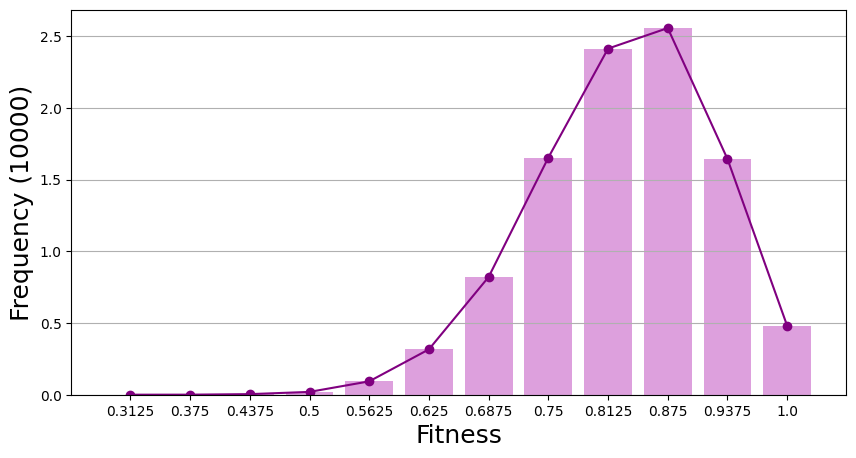

In [44]:
geneticAlgorithm.showBarPlot(genome_id, samplingLength)